In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Types

In [5]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"A":dtypes, "B":n_unique}).T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
A,object,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object
B,70,1741,10,26,566,3113,6,2,5,5,511,207,115,60,4525,44,77,1


In [6]:
df.drop('country', axis=1, inplace=True)

In [7]:
cols = ['floors','waterfront', 'view', 'condition', 'bedrooms']
df[cols] = df[cols].astype('category')

In [8]:
df["street"].value_counts()

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
                        ..
501 N 143rd St           1
14855 SE 10th Pl         1
759 Ilwaco Pl NE         1
5148 S Creston St        1
10915 243rd Ave NE       1
Name: count, Length: 4525, dtype: int64

In [9]:
df["street_clean"] = df["street"].str.replace(r'^\d+\d+', '', regex=True)
df["street_type"] = df["street_clean"].str.split().str[-1]
df.drop('street', axis=1, inplace=True)

In [10]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,street_clean,street_type
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,Densmore Ave N,N
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,W Blaine St,St
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,-26214 143rd Ave SE,SE
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,170th Pl NE,NE
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,170th Ave NE,NE


In [11]:
df[df["yr_built"] == 0].shape[0]

0

In [12]:
df[df["sqft_basement"] == 0].shape[0]

2745

In [13]:
df[['state', 'zipcode']] = df['statezip'].str.split(' ', expand=True)
df['zipcode'] = df['zipcode'].astype(int)
df.drop('statezip', axis=1, inplace=True)

In [14]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"A":dtypes, "B":n_unique}).T

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,street_clean,street_type,state,zipcode
A,object,float64,category,float64,int64,int64,category,category,category,category,int64,int64,int64,int64,object,object,object,object,int64
B,70,1741,10,26,566,3113,6,2,5,5,511,207,115,60,44,2843,32,1,77


In [15]:
df.drop('state', axis=1, inplace=True)

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df['year_sold'] = df['date'].dt.year

In [18]:
df['year_sold'].value_counts()

year_sold
2014    4600
Name: count, dtype: int64

In [19]:
df.drop('year_sold', axis=1, inplace=True)

In [20]:
df['month_sold'] = df['date'].dt.month

In [21]:
df['month_sold'].value_counts()

month_sold
6    2179
5    1768
7     653
Name: count, dtype: int64

In [22]:
df['month_sold'] = df['month_sold'].astype('category')

In [23]:
df.drop('date', axis=1, inplace=True)

In [24]:
df['yr_renovated'].value_counts()

yr_renovated
0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
2002      41
1983      41
1999      41
1998      40
1993      39
1912      33
1992      32
1979      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1968       9
1970       9
1954       8
1945       7
2007       7
1974       6
1934       6
1958       5
1986       5
1971       5
1978       3
1955       2
1980       2
1995       2
1981       1
1953       1
1987       1
1966       1
1960       1
1948       1
1991       1
1913       1
1977       1
1975       1
Name: count, dtype: int64

In [25]:
df['yr_renovated'] = df['yr_renovated'].replace(0, np.nan)
df['renov_age'] = 2014 - df['yr_renovated']
df['renov_age'] = df['renov_age'].fillna(0)
df.drop('yr_renovated', axis=1, inplace=True)

In [26]:
counts = df['street_type'].value_counts()
counts

street_type
St           1129
NE            782
SE            637
Pl            376
S             363
SW            361
NW            184
N             183
Ct             96
W              92
E              83
Way            82
Ave            66
Dr             43
Ln             36
Rd             35
Trail          12
Blvd            8
Cir             6
Northeast       5
South           4
Loop            3
Key             3
Terrace         2
Hwy             2
Crest           1
Court           1
Esplanade       1
Strasse         1
WA-900          1
Promenade       1
14              1
Name: count, dtype: int64

In [27]:
rare_values = counts[counts < 3].index
df['street_type_clean'] = df['street_type'].replace(rare_values, 'Other')
print(df['street_type_clean'].value_counts())

street_type_clean
St           1129
NE            782
SE            637
Pl            376
S             363
SW            361
NW            184
N             183
Ct             96
W              92
E              83
Way            82
Ave            66
Dr             43
Ln             36
Rd             35
Trail          12
Other          11
Blvd            8
Cir             6
Northeast       5
South           4
Loop            3
Key             3
Name: count, dtype: int64


In [28]:
df.drop('street_type', axis=1, inplace=True)

In [29]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"A":dtypes, "B":n_unique}).T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean
A,float64,category,float64,int64,int64,category,category,category,category,int64,int64,int64,object,object,int64,category,float64,object
B,1741,10,26,566,3113,6,2,5,5,511,207,115,44,2843,77,3,59,24


In [30]:
df['zipcode'] = df['zipcode'].astype(str)

In [31]:
df['sqft_basement'].value_counts()

sqft_basement
0       2745
500       53
600       45
800       43
900       41
        ... 
1730       1
1870       1
1520       1
2030       1
1640       1
Name: count, Length: 207, dtype: int64

In [32]:
df['has_basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
df['has_basement'] = df['has_basement'].astype('category')

In [33]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"A":dtypes, "B":n_unique}).T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
A,float64,category,float64,int64,int64,category,category,category,category,int64,int64,int64,object,object,object,category,float64,object,category
B,1741,10,26,566,3113,6,2,5,5,511,207,115,44,2843,77,3,59,24,2


In [34]:
df.isnull().sum()

price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
sqft_above           0
sqft_basement        0
yr_built             0
city                 0
street_clean         0
zipcode              0
month_sold           0
renov_age            0
street_type_clean    0
has_basement         0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

# Check Outliers

In [36]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'renov_age'],
      dtype='object')

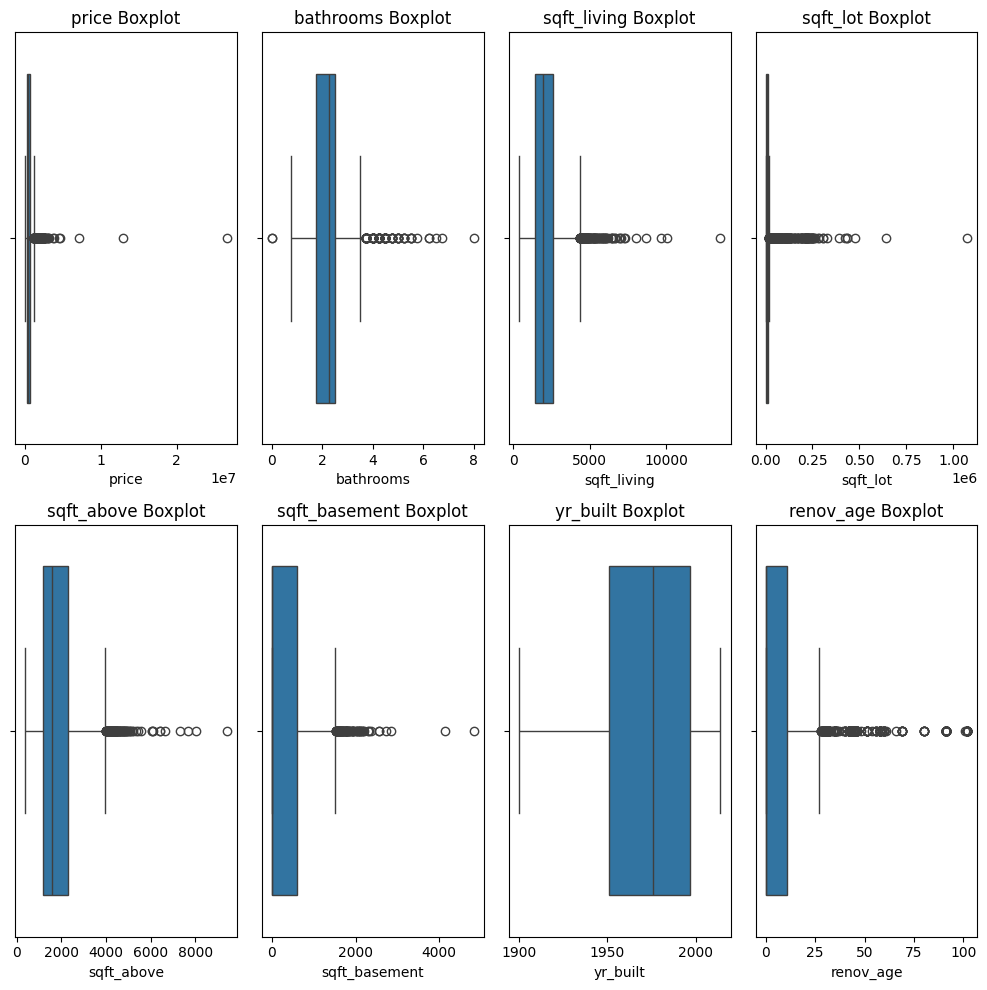

In [37]:
plt.figure(figsize=(10,10))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + len(num_cols)%2, i+1)  
    sns.boxplot(df[col], orient='h')
    plt.title(f'{col} Boxplot')

plt.tight_layout() 
plt.show()

In [38]:
cols_have_outliers = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement','renov_age']
cols_have_outliers

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'renov_age']

In [39]:
for col in cols_have_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR 

    lower_outliers = df[df[col] < lower_fence][col].values
    upper_outliers = df[df[col] > upper_fence][col].values

    df[col].replace(lower_outliers, lower_fence, inplace = True)
    df[col].replace(upper_outliers, upper_fence, inplace = True)

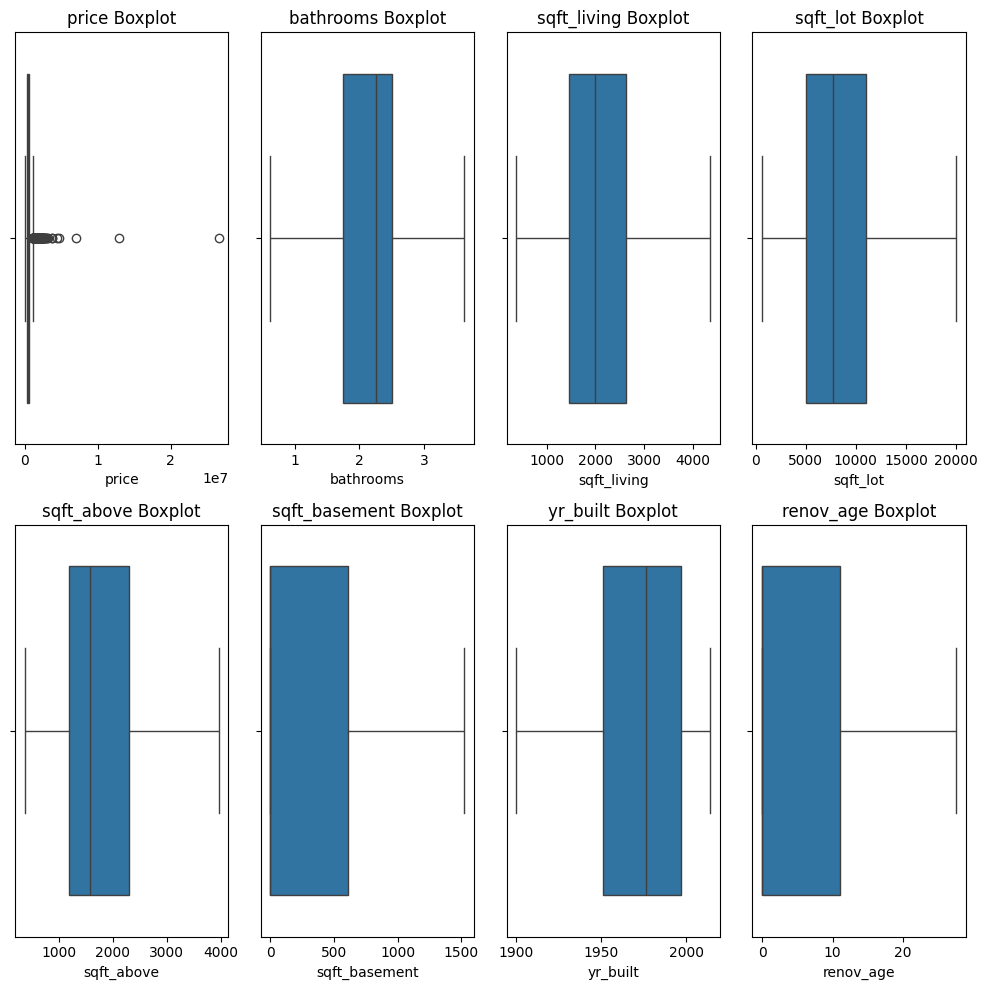

In [40]:
plt.figure(figsize=(10,10))

for i, col in enumerate(num_cols):
    plt.subplot(2, len(num_cols)//2 + len(num_cols)%2, i+1)  
    sns.boxplot(df[col], orient='h')
    plt.title(f'{col} Boxplot')

plt.tight_layout() 
plt.show()

# Visualisation

In [41]:
num_cols = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'renov_age']

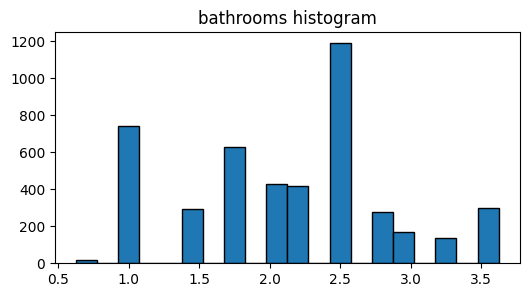

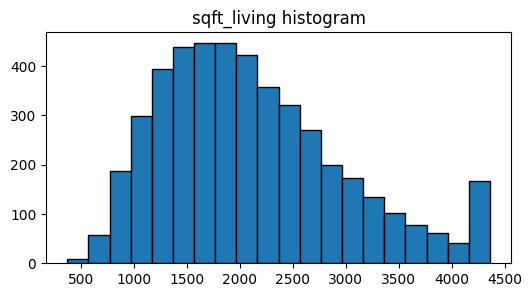

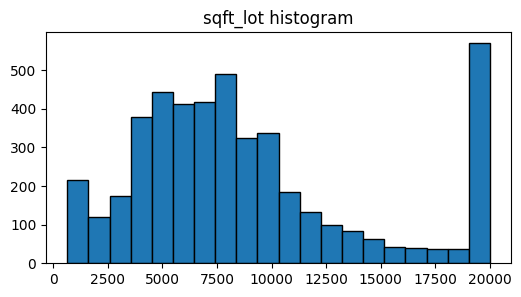

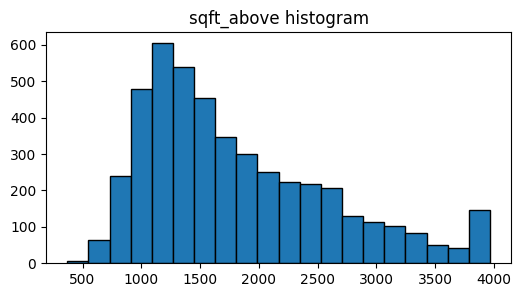

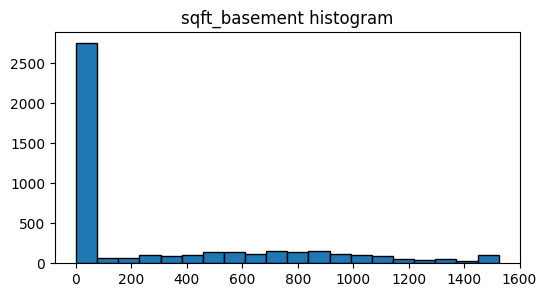

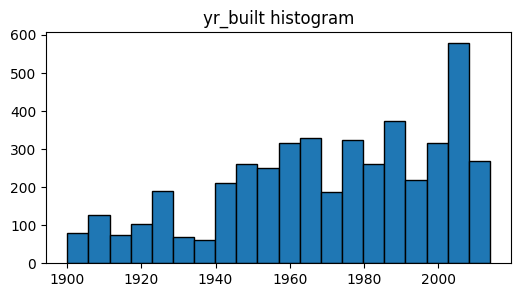

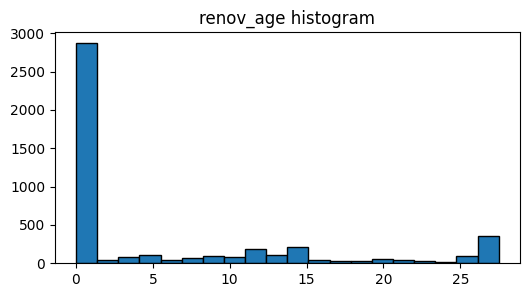

In [42]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'{col} histogram')
    plt.show()

In [43]:
cat_cols = ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'month_sold','has_basement']

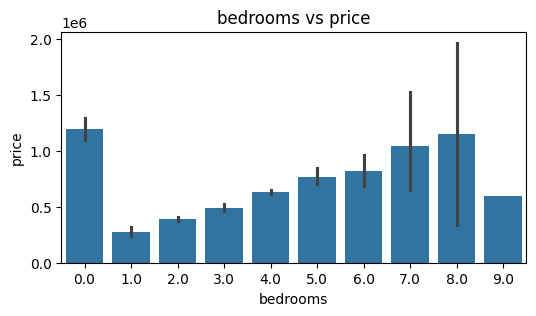

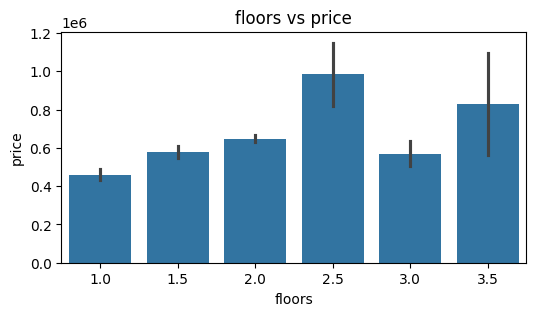

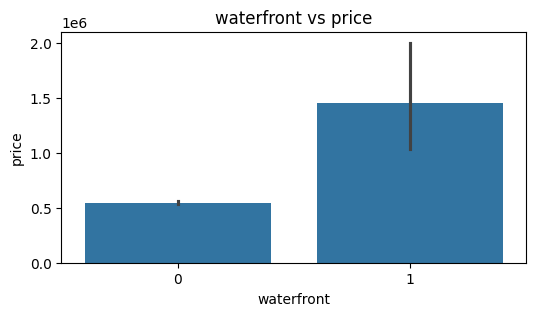

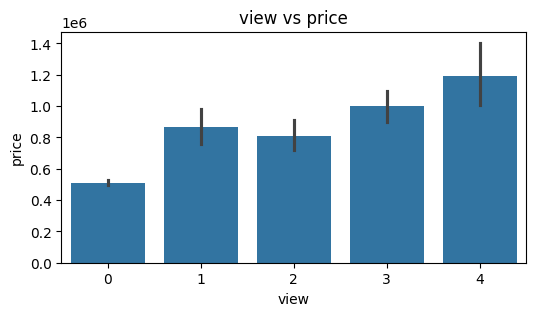

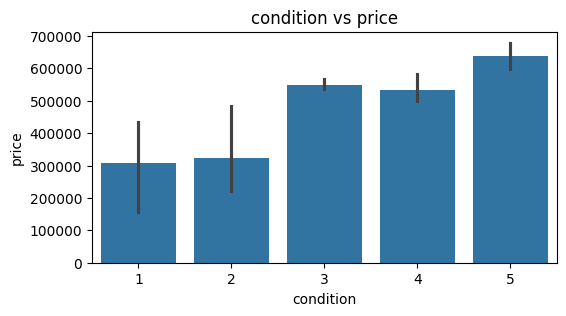

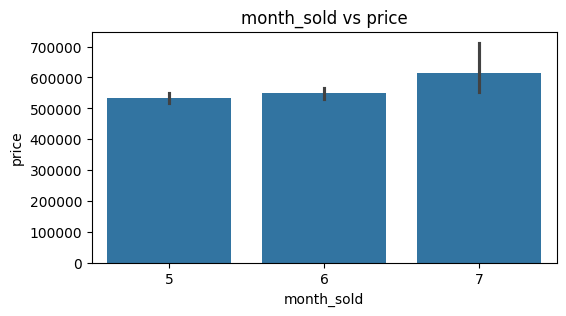

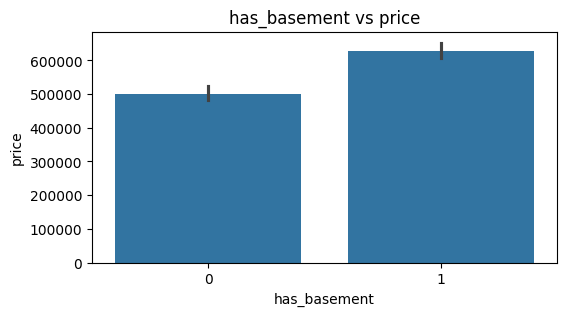

In [44]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.barplot(x=col, y='price', data=df)
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'{col} vs price')
    plt.show()

In [45]:
df[df['bedrooms'] == 0][['price', 'sqft_living', 'city', 'street_clean']]

,price,sqft_living,city,street_clean
2365,1095000.0,3064,Seattle,E Howe St
3209,1295648.0,4360,Redmond,NE 64th Pl


In [46]:
str_cols = df.select_dtypes('object').columns
str_cols

Index(['city', 'street_clean', 'zipcode', 'street_type_clean'], dtype='object')

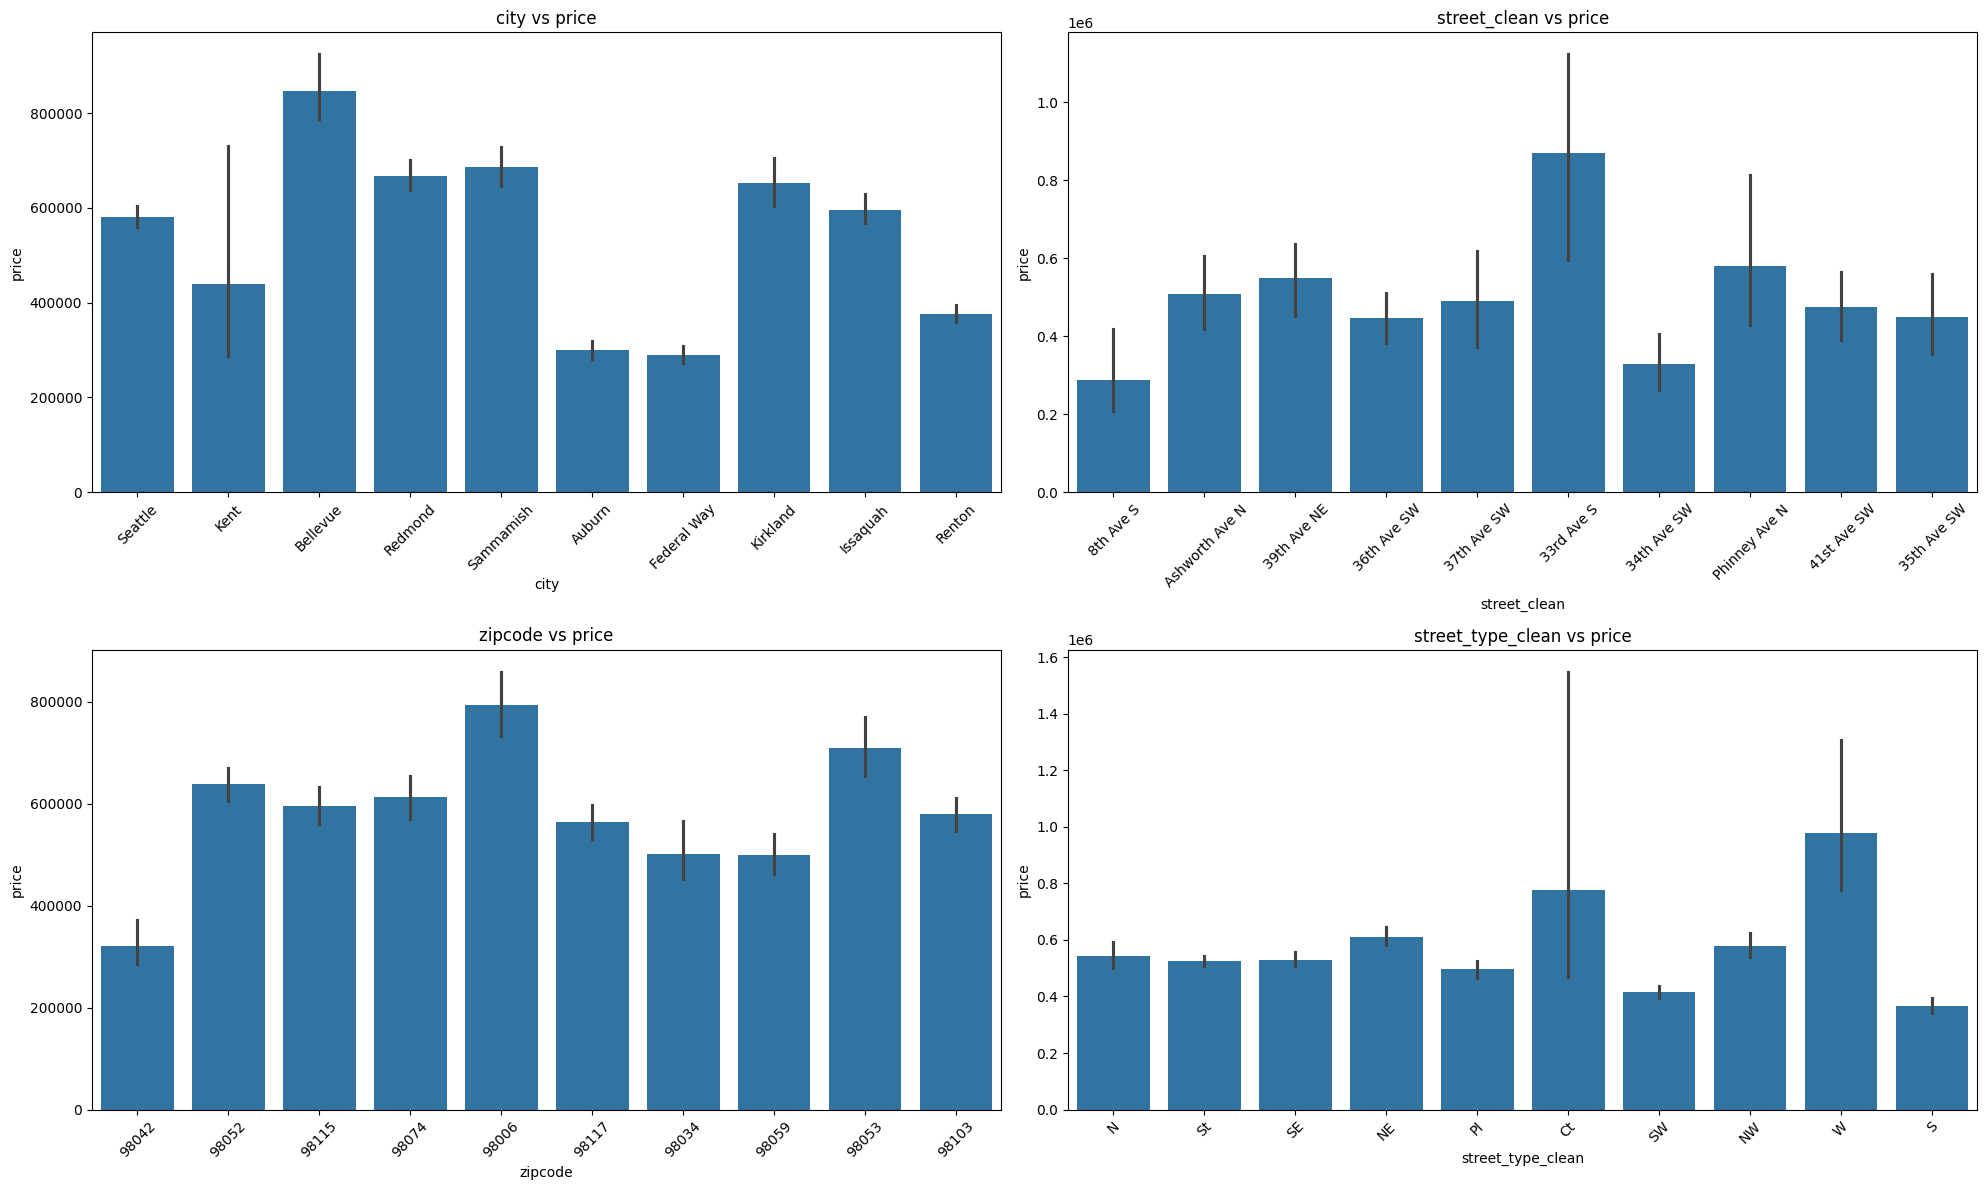

In [47]:
str_cols = ['city', 'street_clean', 'zipcode', 'street_type_clean']

plt.figure(figsize=(20,12))

for i, col in enumerate(str_cols):
    plt.subplot(2, 2, i+1)  
    top_values = df[col].value_counts().nlargest(10).index
    sns.barplot(x=col, y='price', data=df[df[col].isin(top_values)])
    plt.xticks(rotation=45)
    plt.title(f'{col} vs price')

plt.tight_layout()
plt.show()

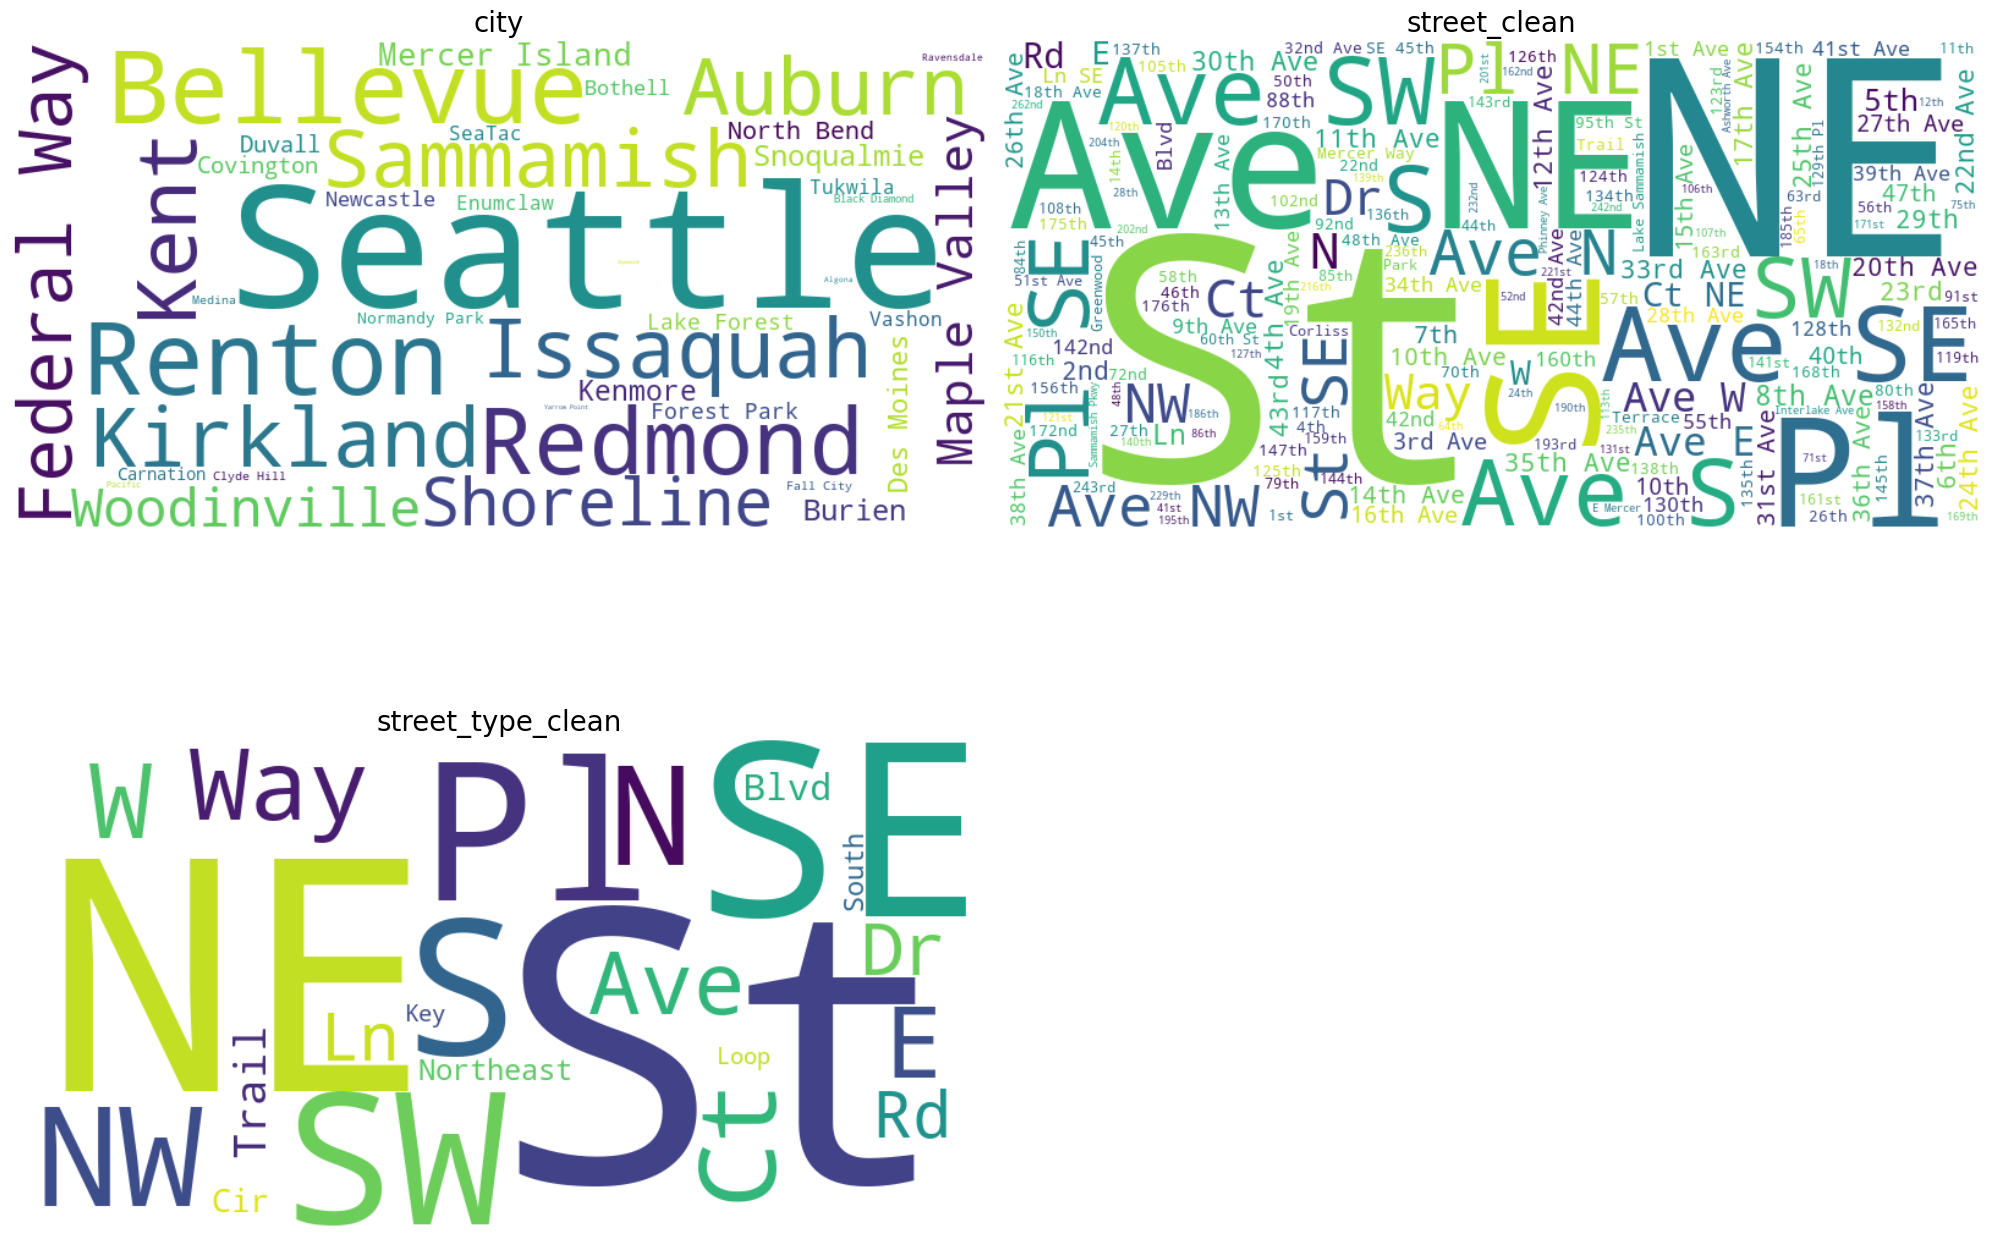

In [48]:
from wordcloud import WordCloud

str_cols = ['city', 'street_clean','street_type_clean']

plt.figure(figsize=(20,15))

for i, col in enumerate(str_cols):
    text = ' '.join(df[col])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.subplot(2,2,i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(col, fontsize=20)

plt.tight_layout()
plt.show()

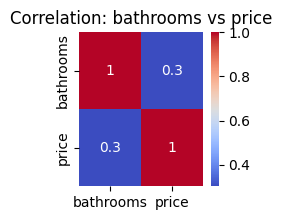

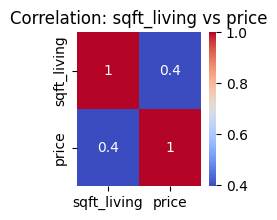

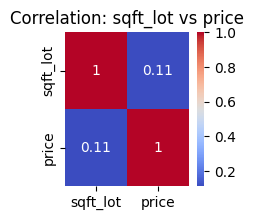

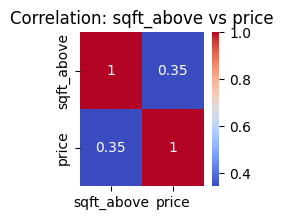

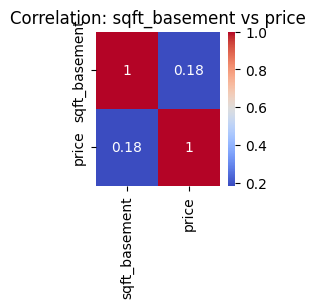

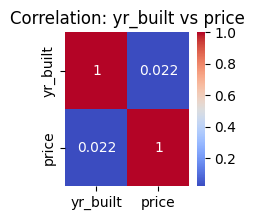

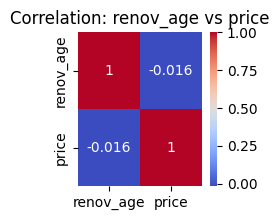

In [49]:
for col in num_cols:
    corr = df[[col, 'price']].corr()
    plt.figure(figsize=(2,2))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation: {col} vs price")
    plt.show()

# Encoding

In [50]:
df['month_sold'] = df['month_sold'].astype(int)
df['has_basement'] = df['has_basement'].astype(int)

In [51]:
ordered_cols = ['bedrooms', 'floors', 'waterfront', 'view', 'condition']

le = LabelEncoder()
for col in ordered_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
0,313000.0,3,1.50,1340,7912,1,0,0,2,1340,0,1955,Shoreline,Densmore Ave N,98133,5,9.0,N,0
1,2384000.0,5,2.50,3650,9050,2,0,4,4,3370,280,1921,Seattle,W Blaine St,98119,5,0.0,St,1
2,342000.0,3,2.00,1930,11947,0,0,0,3,1930,0,1966,Kent,-26214 143rd Ave SE,98042,5,0.0,SE,0
3,420000.0,3,2.25,2000,8030,0,0,0,3,1000,1000,1963,Bellevue,170th Pl NE,98008,5,0.0,NE,1
4,550000.0,4,2.50,1940,10500,0,0,0,3,1140,800,1976,Redmond,170th Ave NE,98052,5,22.0,NE,1


In [53]:
import category_encoders as ce

categorical_cols = ['city', 'street_clean', 'zipcode', 'street_type_clean']

target_enc = ce.TargetEncoder(cols=categorical_cols)
df[categorical_cols] = target_enc.fit_transform(df[categorical_cols], df['price'])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
0,313000.0,3,1.50,1340,7912,1,0,0,2,1340,0,1955,420396.789025,536030.888190,374553.080247,5,9.0,542441.791495,0
1,2384000.0,5,2.50,3650,9050,2,0,4,4,3370,280,1921,579837.467282,790326.529020,895536.950860,5,0.0,523927.791314,1
2,342000.0,3,2.00,1930,11947,0,0,0,3,1930,0,1966,439492.452325,524645.024370,320321.675575,5,0.0,530198.225240,0
3,420000.0,3,2.25,2000,8030,0,0,0,3,1000,1000,1963,847180.662995,534793.485371,600544.375179,5,0.0,611113.684717,1
4,550000.0,4,2.50,1940,10500,0,0,0,3,1140,800,1976,667649.534728,549085.353854,637554.852314,5,22.0,611113.684717,1


In [54]:
dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"A":dtypes, "B":n_unique}).T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
A,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,int64
B,1741,10,14,475,2614,6,2,5,5,436,160,115,44,1847,77,3,29,24,2


# Splitting Data

In [55]:
y = df['price']
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [56]:
x = df.iloc[:,1:]
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
0,3,1.50,1340,7912,1,0,0,2,1340,0,1955,420396.789025,536030.888190,374553.080247,5,9.0,542441.791495,0
1,5,2.50,3650,9050,2,0,4,4,3370,280,1921,579837.467282,790326.529020,895536.950860,5,0.0,523927.791314,1
2,3,2.00,1930,11947,0,0,0,3,1930,0,1966,439492.452325,524645.024370,320321.675575,5,0.0,530198.225240,0
3,3,2.25,2000,8030,0,0,0,3,1000,1000,1963,847180.662995,534793.485371,600544.375179,5,0.0,611113.684717,1
4,4,2.50,1940,10500,0,0,0,3,1140,800,1976,667649.534728,549085.353854,637554.852314,5,22.0,611113.684717,1


# Normalization

In [57]:
col_num_norm = x.select_dtypes('number').columns
col_num_norm

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'city', 'street_clean', 'zipcode', 'month_sold',
       'renov_age', 'street_type_clean', 'has_basement'],
      dtype='object')

In [58]:
scaler = MinMaxScaler()

In [59]:
x[col_num_norm] = scaler.fit_transform(x[col_num_norm])
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,city,street_clean,zipcode,month_sold,renov_age,street_type_clean,has_basement
0,0.333333,0.291667,0.243108,0.375646,0.2,0.0,0.0,0.50,0.269819,0.000000,0.482456,0.156644,0.016153,0.113242,0.0,0.327273,0.288090,0.0
1,0.555556,0.625000,0.822055,0.434414,0.4,0.0,1.0,1.00,0.834492,0.183607,0.184211,0.348014,0.089658,0.605181,0.0,0.000000,0.257960,1.0
2,0.333333,0.458333,0.390977,0.584022,0.0,0.0,0.0,0.75,0.433936,0.000000,0.578947,0.179564,0.012862,0.062033,0.0,0.000000,0.268165,0.0
3,0.333333,0.541667,0.408521,0.381739,0.0,0.0,0.0,0.75,0.175243,0.655738,0.552632,0.668896,0.015795,0.326634,0.0,0.000000,0.399847,1.0
4,0.444444,0.625000,0.393484,0.509296,0.0,0.0,0.0,0.75,0.214186,0.524590,0.666667,0.453412,0.019927,0.361581,0.0,0.800000,0.399847,1.0


# -------------------------------------------xxx--------------------------------------------